# Variance comparison

### Sentiment ON, full coherence features

In this notebook, we produce the plots of opinion variance in the last period ($T=1000$). Simulations were run with sentiment ($\alpha=1$). Data comes from the FIG1-DATA-NEW folder. Similar notebooks exist for models with coherence features and without sentiment (4 variations in total, 1 for each subplot of figure 2). Many different parameters and parameter combinations were explored, but the only one that made it into the paper analyses the effect of $\lambda$, disaggregated by $\theta$, as well as the effect of $\lambda$, disaggregated by $\gamma$ (figure 4).


In [1]:
import numpy as np
import os

%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rc
rc('text', usetex=True)

Make export folders if necessary

In [2]:
parent_path = os.path.join(os.getcwd(), "exploratory_figures")

path1 = os.path.join(os.getcwd(), "exploratory_figures\\variance")
path2 = os.path.join(os.getcwd(), "exploratory_figures\\variance_erbars")

if not os.path.exists(parent_path):
    os.mkdir(parent_path)
if not os.path.exists(path1):
    os.mkdir(path1)
if not os.path.exists(path2):
    os.mkdir(path2)

In [3]:
sns.set_style('whitegrid')

l = '$\lambda$'
th = '$\\theta$'
g = '$\gamma$'
k = '$\kappa$'

In [4]:
os.listdir('FIG1-DATA-NEW_')

D:\Econ\Uni_Kiel\projects\opinion_formation\full_credibility


['SENTIMENTS95',
 'FULL SENTIMENTS.zip',
 'FULL SENTIMENTS',
 'NO SENTIMENTS.zip',
 'NO SENTIMENTS']

## with sentiment

In [5]:
var = np.full((19, 9, 9, 9), np.nan)

# different lambda values
vals = ['05'] + [str(i) for i in range(10, 96, 5)]

for i, val in enumerate(vals):
    with open(f'FIG1-DATA-NEW_/FULL SENTIMENTS/K1G1T1-A300T1000M{val}S100-n8/stats.txt') as f:
        for j, line in enumerate(f):
            var[i][j%9][(j//9)%9][j//81] = float(line.split('\t')[2])      

## $\Lambda$

Integrate statistics of interest $T$ (variance) to find unconditional statistics for different values of $\lambda$ - both  for with and without sentiment.

Sums move in steps of $10^{-1}$, slight abuse of notation.

$T(\lambda) = \frac{1}{9^3}\sum_{\theta=0.1}^{0.9}\sum_{\gamma=0.1}^{0.9}\sum_{\kappa=0.1}^{0.9}T(\lambda, \theta, \gamma, \kappa)$

In [6]:
n = len(var[i,:,:,:].flatten())
var_l = np.array([var[i,:,:,:].mean() for i in range(len(var))])
var_l_er = np.array([np.std(var[i,:,:,:].flatten()) / np.sqrt(n) for i in range(len(var))])

<IPython.core.display.Javascript object>


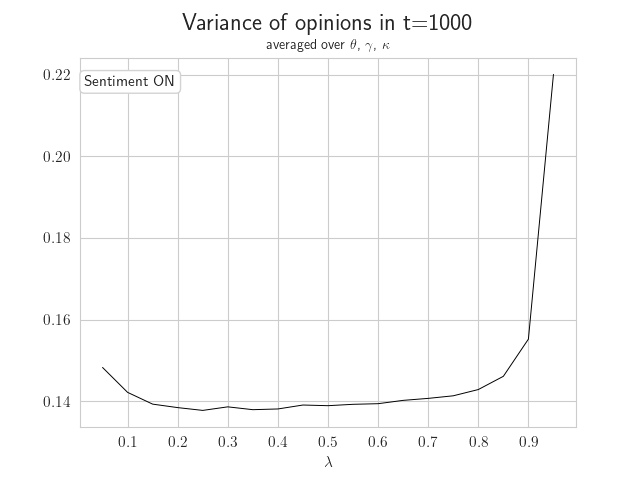

In [7]:
plt.figure()
plt.title(f"\LARGE{{Variance of opinions in t=1000}} \n \\normalsize{{averaged over {th}, {g}, {k}}}")

plt.plot([int(val)/100 for val in vals], var_l, c='black', lw=0.7)

plt.xticks([i*0.01 for i in range(10, 91, 10)])

plt.xlabel(l, fontsize=11)

# textbox
ax = plt.gca()
props = dict(boxstyle='round', facecolor='white', edgecolor='lightgrey', alpha=1)
plt.text(0.009, 0.924, 'Sentiment ON', transform=ax.transAxes, bbox=props, fontsize=11)
ax.tick_params(axis='both', labelsize=11)

plt.savefig('exploratory_figures/variance/lambda_SY.png')

<IPython.core.display.Javascript object>


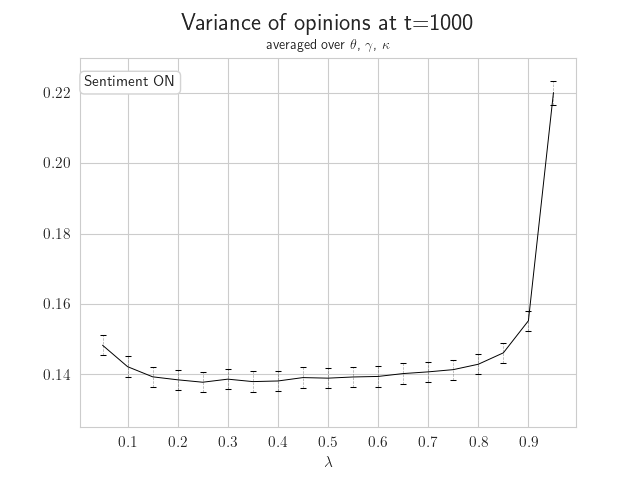

In [8]:
plt.figure()
plt.title(f"\LARGE{{Variance of opinions at t=1000}} \n \\normalsize{{averaged over {th}, {g}, {k}}}")

eb = plt.errorbar([int(val)/100 for val in vals], var_l, var_l_er, c='black', lw=0.7,
                  elinewidth=0.5, capsize=2, capthick=0.75)
eb[-1][0].set_linestyle('--')
eb[-1][0].set_alpha(0.35)

plt.xticks([i*0.01 for i in range(10, 91, 10)])
plt.ylim(bottom=0.125, top=0.23)

# textbox
ax = plt.gca()
props = dict(boxstyle='round', facecolor='white', edgecolor='lightgrey', alpha=1)
plt.text(0.009, 0.922, 'Sentiment ON', transform=ax.transAxes, bbox=props, fontsize=11)
ax.tick_params(axis='both', labelsize=11)

plt.xlabel(l, fontsize=11)
plt.savefig('exploratory_figures/variance_erbars/lambda_SY.png')

## conditional values

In [9]:
# colomap for different values of variables that lambda is conditioned on
cmap = plt.cm.coolwarm(np.linspace(0.1, 0.9, 9))

### $\lambda|\theta$

In [10]:
n = len(var[0,0,:,:].flatten())
var_l_t = np.array([np.array([var[j,i,:,:].mean() for j in range(19)]) for i in range(9)])
var_l_t_er = np.array([
    np.array([
        np.std(var[j,i,:,:].flatten()) / np.sqrt(n) for j in range(19)
    ]) for i in range(9)
])

<IPython.core.display.Javascript object>


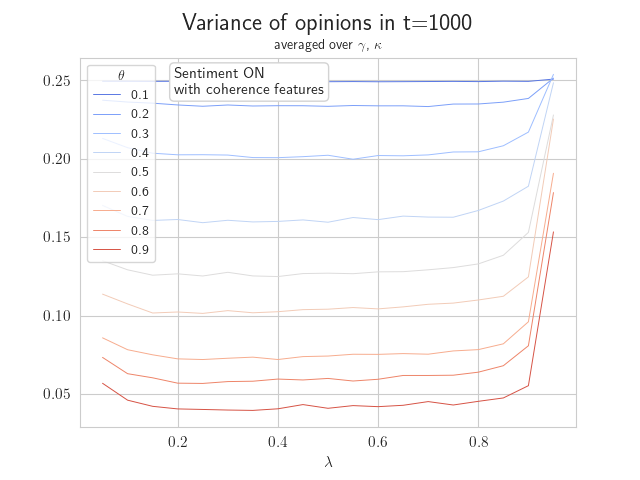

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [11]:
plt.figure()
plt.title(f"\LARGE{{Variance of opinions in t=1000}} \n \\normalsize{{averaged over {g}, {k}}}")

x = [int(val)/100 for val in vals]

for i in range(9):
    plt.plot(x, var_l_t[i], c=cmap[i], lw=0.7, label=(i+1)/10)
    
plt.xlabel(l, fontsize=11)

# textbox
ax = plt.gca()
props = dict(boxstyle='round', facecolor='white', edgecolor='lightgrey', alpha=1)
plt.text(0.19, 0.9025, 'Sentiment ON \n with coherence features', transform=ax.transAxes, bbox=props, fontsize=11)
ax.tick_params(axis='both', labelsize=11)

plt.legend(title=th, fontsize=10, loc='upper left')

plt.savefig('exploratory_figures/variance/var_lambda_theta_SY_cred.png')
plt.savefig('exploratory_figures/variance/var_lambda_theta_SY_cred.eps')

<IPython.core.display.Javascript object>


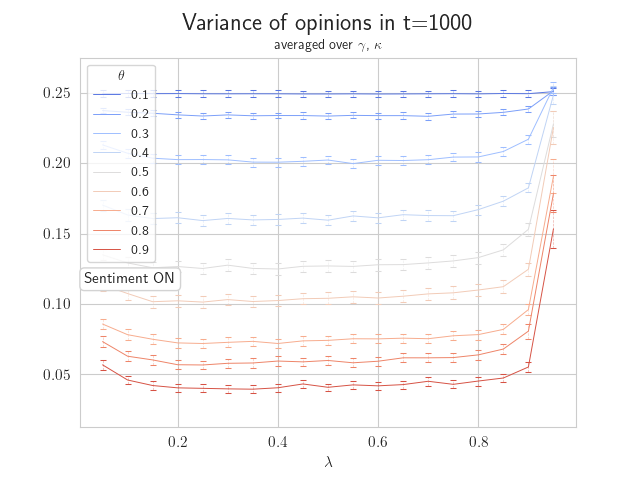

In [12]:
plt.figure()
plt.title('\LARGE{Variance of opinions in t=1000} \n \\normalsize{averaged over $\gamma$, $\kappa$}')

x = [int(val)/100 for val in vals]

lines = list()
for i in range(9):
    eb = plt.errorbar(x, var_l_t[i], var_l_t_er[i], c=cmap[i], lw=0.7, label=(i+1)/10,
                      elinewidth=0.5, capsize=2, capthick=0.75)
    lines.append(eb[0])
    eb[-1][0].set_linestyle('--')
    eb[-1][0].set_alpha(0.45)
    
plt.xlabel('$\lambda$', fontsize=11)
plt.ylim(bottom=0.0125, top=0.275)

# textbox
ax = plt.gca()
props = dict(boxstyle='round', facecolor='white', edgecolor='lightgrey', alpha=1)
plt.text(0.009, 0.39, 'Sentiment ON', transform=ax.transAxes, bbox=props, fontsize=11)
ax.tick_params(axis='both', labelsize=11)

labels = [i/10 for i in range(1,10)]
plt.legend(lines, labels, title='$\\theta$', fontsize=10, loc='upper left')

plt.savefig('exploratory_figures/variance_erbars/lambda_theta_SY.png')

### $\lambda|\gamma$

In [13]:
var_l_g = np.array([var[j,:,i,:].mean() for j in range(19) for i in range(9)]).reshape((9, 19))

<IPython.core.display.Javascript object>


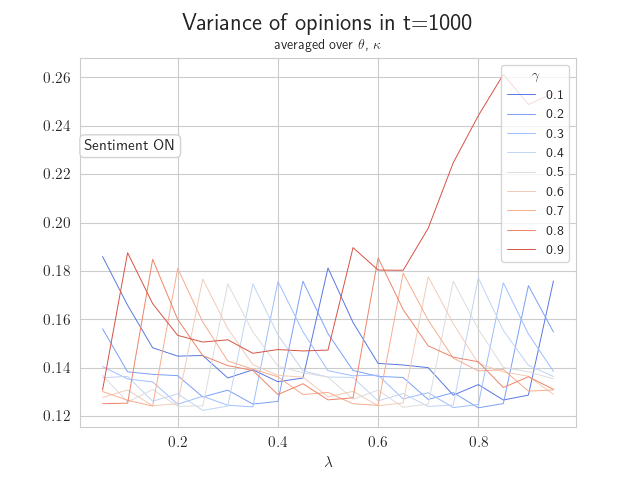

In [14]:
plt.figure()
plt.title(f"\LARGE{{Variance of opinions in t=1000}} \n \\normalsize{{averaged over {th}, {k}}}")

x = [int(val)/100 for val in vals]

for i in range(9):
    plt.plot(x, var_l_g[i], c=cmap[i], lw=0.7, label=(i+1)/10)

plt.xlabel(l, fontsize=11)

# textbox
ax = plt.gca()
props = dict(boxstyle='round', facecolor='white', edgecolor='lightgrey', alpha=1)
plt.text(0.009, 0.75, 'Sentiment ON', transform=ax.transAxes, bbox=props, fontsize=11)
ax.tick_params(axis='both', labelsize=11)

plt.legend(title=g, fontsize=10, loc='upper right')

plt.savefig('exploratory_figures/variance/lambda_gamma_SY.png')

<IPython.core.display.Javascript object>


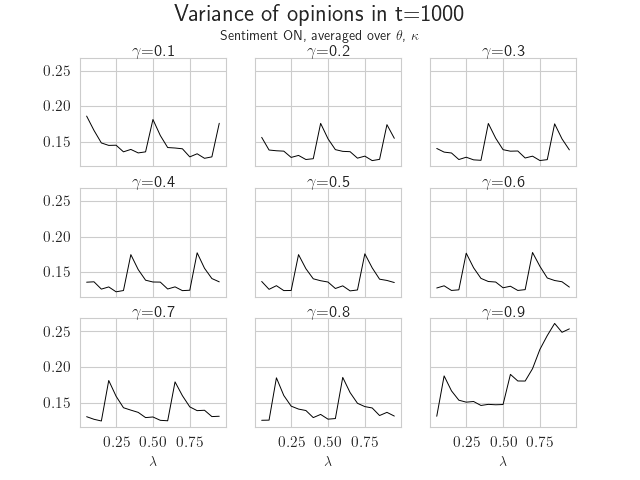

In [46]:
fig, axes = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True)
plt.suptitle(f"\LARGE{{Variance of opinions in t=1000}} \n \\normalsize{{Sentiment ON, averaged over {th}, {k}}}", x=0.5, y=0.99)

axes = axes.flatten()

x = [int(val)/100 for val in vals]

for i in range(9):
    axes[i].plot(x, var_l_g[i], c='black', lw=0.7)
    axes[i].set_title(f'{g}$ = ${(i+1)/10}', y=0.93)
    axes[i].tick_params(axis='both', labelsize=11)
    if i > 5:
        axes[i].set_xlabel(l)

plt.savefig('exploratory_figures/variance/lambda_gamma_SY_separate.png')
# .eps for better scaling due to vectorised storage
plt.savefig('exploratory_figures/variance/var_lambda_gamma_SY_separate_cred.eps')

### $\lambda|\kappa$

In [16]:
var_l_k = (1/81) * np.array([var[j,:,:,i].sum() for j in range(19) for i in range(9)]).reshape((9, 19))

<IPython.core.display.Javascript object>


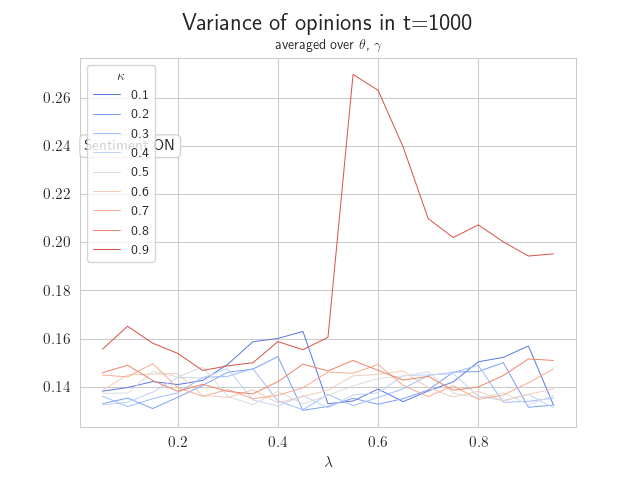

In [17]:
plt.figure()
plt.title(f"\LARGE{{Variance of opinions in t=1000}} \n \\normalsize{{averaged over {th}, {g}}}")

x = [int(val)/100 for val in vals]

for i in range(9):
    plt.plot(x, var_l_k[i], c=cmap[i], lw=0.7, label=(i+1)/10)

plt.xlabel(l, fontsize=11)

# textbox
ax = plt.gca()
props = dict(boxstyle='round', facecolor='white', edgecolor='lightgrey', alpha=1)
plt.text(0.009, 0.75, 'Sentiment ON', transform=ax.transAxes, bbox=props, fontsize=11)
ax.tick_params(axis='both', labelsize=11)

plt.legend(title=k, fontsize=10)

plt.savefig('exploratory_figures/variance/lambda_kappa_SY.png')

<IPython.core.display.Javascript object>


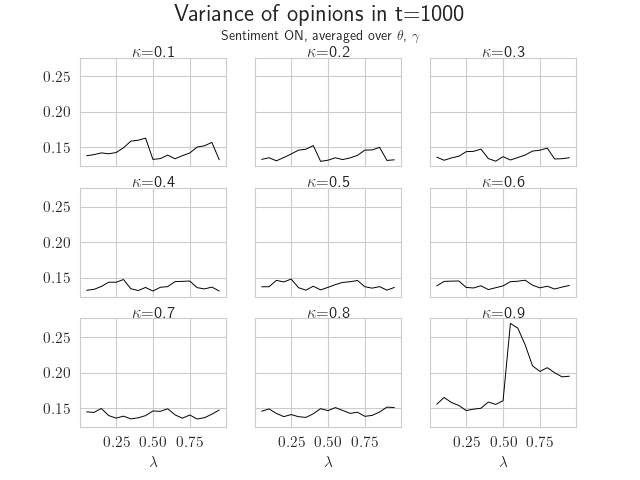

In [18]:
fig, axes = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True)
plt.suptitle(f"\LARGE{{Variance of opinions in t=1000}} \n \\normalsize{{Sentiment ON, averaged over {th}, {g}}}", x=0.5, y=0.99)

axes = axes.flatten()

x = [int(val)/100 for val in vals]

for i in range(9):
    axes[i].plot(x, var_l_k[i], c='black', lw=0.7)
    axes[i].set_title(f'{k}$ = ${(i+1)/10}', y=0.93)
    axes[i].tick_params(axis='both', labelsize=11)
    if i > 5:
        axes[i].set_xlabel(l, fontsize=11)
        
    
plt.savefig('exploratory_figures/variance/lambda_kappa_SY_separate.png')

## $\Theta$

Integrate statistics of interest $T$ (variance) to find unconditional statistics for different values of $\theta$.

Sums move in steps of $10^{-1}$, except lambda, which moves in steps of $5\cdot10^{-2}$

$T(\theta) = \frac{1}{19\cdot9^2}\sum_{\lambda=0.05}^{0.95}\sum_{\gamma=0.1}^{0.9}\sum_{\kappa=0.1}^{=0.9}T(\lambda, \theta, \gamma, \kappa)$

In [19]:
n = len(var[:,0,:,:].flatten())
var_th = np.array([var[:,i,:,:].mean() for i in range(9)])
var_th_er = np.array([np.std(var[:,i,:,:].flatten()) / np.sqrt(n) for i in range(9)])

<IPython.core.display.Javascript object>


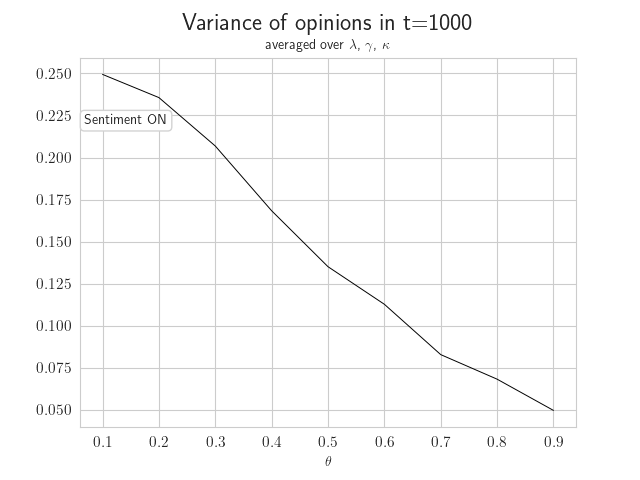

In [20]:
plt.figure()
plt.title(f"\LARGE{{Variance of opinions in t=1000}} \n \\normalsize{{averaged over {l}, {g}, {k}}}")

x = [i*0.1 for i in range(1,10)]

plt.plot(x, var_th, c='black', lw=0.7)

plt.xticks([i*0.01 for i in range(10, 91, 10)])

plt.xlabel(th)

# textbox
ax = plt.gca()
props = dict(boxstyle='round', facecolor='white', edgecolor='lightgrey', alpha=1)
plt.text(0.009, 0.82, 'Sentiment ON', transform=ax.transAxes, bbox=props)
ax.tick_params(axis='both', labelsize=11)

plt.savefig('exploratory_figures/variance/theta_SY.png')

<IPython.core.display.Javascript object>


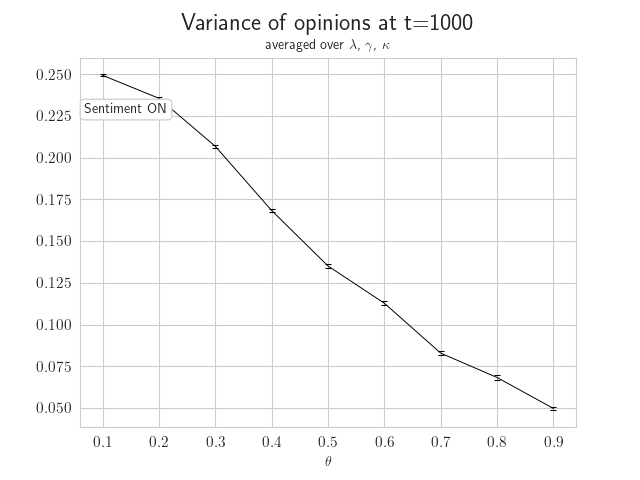

In [21]:
plt.figure()
plt.title(f"\LARGE{{Variance of opinions at t=1000}} \n \\normalsize{{averaged over {l}, {g}, {k}}}")

eb = plt.errorbar([i*0.1 for i in range(1,10)], var_th, var_th_er, c='black', lw=0.7,
                  elinewidth=0.5, capsize=2, capthick=0.75)
eb[-1][0].set_linestyle('--')
eb[-1][0].set_alpha(0.35)

plt.xticks([i*0.01 for i in range(10, 91, 10)])

# textbox
ax = plt.gca()
props = dict(boxstyle='round', facecolor='white', edgecolor='lightgrey', alpha=1)
plt.text(0.009, 0.85, 'Sentiment ON', transform=ax.transAxes, bbox=props)
ax.tick_params(axis='both', labelsize=11)

plt.xlabel(th)
plt.savefig('exploratory_figures/variance_erbars/theta_SY.png')

### $\theta|\lambda$

Integrate only gamma and kappa. Any variable conditioned on $\lambda$ needs an extra colormap.

In [22]:
cmap_l = plt.cm.coolwarm(np.linspace(0.05, 0.95, 19))

In [23]:
var_t_l = np.array([np.array([var[j,i,:,:].mean() for i in range(9)]) for j in range(19)])

<IPython.core.display.Javascript object>


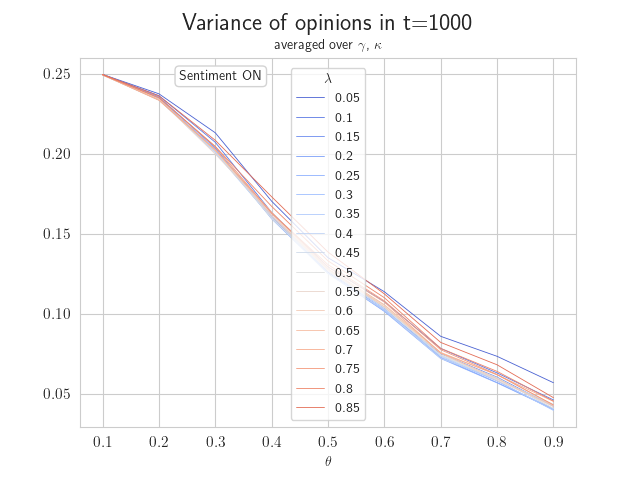

In [24]:
plt.figure()
plt.title(f"\LARGE{{Variance of opinions in t=1000}} \n \\normalsize{{averaged over {g}, {k}}}")

x = np.linspace(0.1, 0.9, 9)

for i in range(17):
    plt.plot(x, var_t_l[i], c=cmap_l[i], lw=0.6, label=int(vals[i])/100)
    
plt.xlabel(th)

# textbox
ax = plt.gca()
props = dict(boxstyle='round', facecolor='white', edgecolor='lightgrey', alpha=1)
plt.text(0.2, 0.94, 'Sentiment ON', transform=ax.transAxes, bbox=props)
ax.tick_params(axis='both', labelsize=11)

plt.legend(title=l, fontsize=10)

plt.savefig('exploratory_figures/variance/theta_lambda_SY.png')

### $\theta|\gamma$

In [25]:
var_t_g = np.array([var[:,j,i,:].mean() for i in range(9) for j in range(9)]).reshape((9,9))

<IPython.core.display.Javascript object>


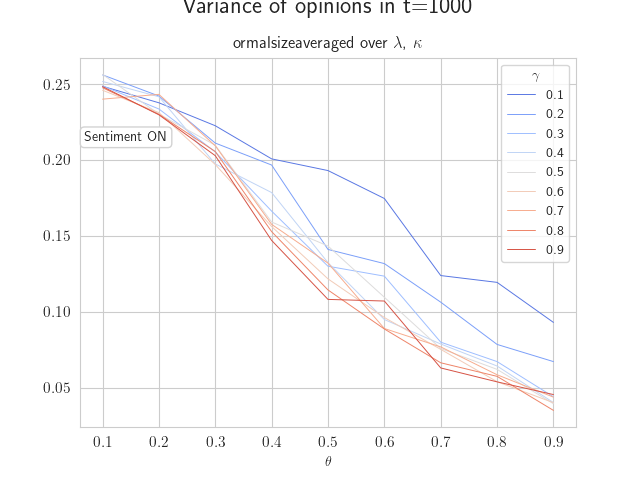

In [26]:
plt.figure()
plt.title(f"\LARGE{{Variance of opinions in t=1000}} \n \\normalsize{{averaged over {l}, {k}}}")

x = np.linspace(0.1, 0.9, 9)

for i in range(9):
    plt.plot(x, var_t_g[i], c=cmap[i], lw=0.7, label=np.round(x[i], decimals=1))
    
plt.xlabel(th)

# textbox
ax = plt.gca()
props = dict(boxstyle='round', facecolor='white', edgecolor='lightgrey', alpha=1)
plt.text(0.009, 0.775, 'Sentiment ON', transform=ax.transAxes, bbox=props)
ax.tick_params(axis='both', labelsize=11)

plt.legend(title=g, fontsize=10)

plt.savefig('exploratory_figures/variance/theta_gamma_SY.png')

### $\theta|\kappa$

In [27]:
var_t_k = np.array([var[:,j,:,i].mean() for i in range(9) for j in range(9)]).reshape((9,9))

<IPython.core.display.Javascript object>


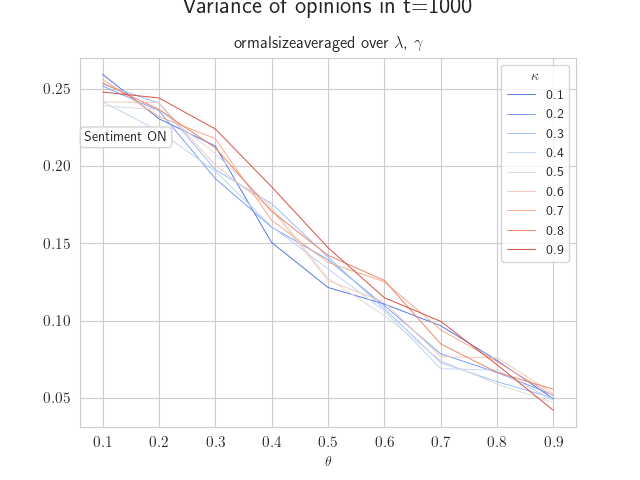

In [28]:
plt.figure()
plt.title(f"\LARGE{{Variance of opinions in t=1000}} \n \normalsize{{averaged over {l}, {g}}}")

x = np.linspace(0.1, 0.9, 9)

for i in range(9):
    plt.plot(x, var_t_k[i], c=cmap[i], lw=0.7, label=np.round(x[i], decimals=1))
    
plt.xlabel(th)

# textbox
ax = plt.gca()
props = dict(boxstyle='round', facecolor='white', edgecolor='lightgrey', alpha=1)
plt.text(0.009, 0.775, 'Sentiment ON', transform=ax.transAxes, bbox=props)
ax.tick_params(axis='both', labelsize=11)

plt.legend(title=k, fontsize=10)

plt.savefig('exploratory_figures/variance/theta_kappa_SY.png')

## $\Gamma$

Integrate statistics of interest $T$ (variance) to find unconditional statistics for different values of $\gamma$ - both  for with and without sentiment.

Sums move in steps of $10^{-1}$, except lambda, which moves in steps of $5\cdot10^{-2}$

$T(\gamma) = \frac{1}{19\cdot9^2}\sum_{\theta=0.1}^{0.9}\sum_{\lambda=0.05}^{0.95}\sum_{\kappa=0.1}^{=0.9}T(\lambda, \theta, \gamma, \kappa)$

In [29]:
n = len(var[:,:,0,:].flatten())
var_g = np.array([var[:,:,i,:].mean() for i in range(9)])
var_g_er = np.array([np.std(var[:,:,i,:].flatten()) / np.sqrt(n) for i in range(9)])

<IPython.core.display.Javascript object>


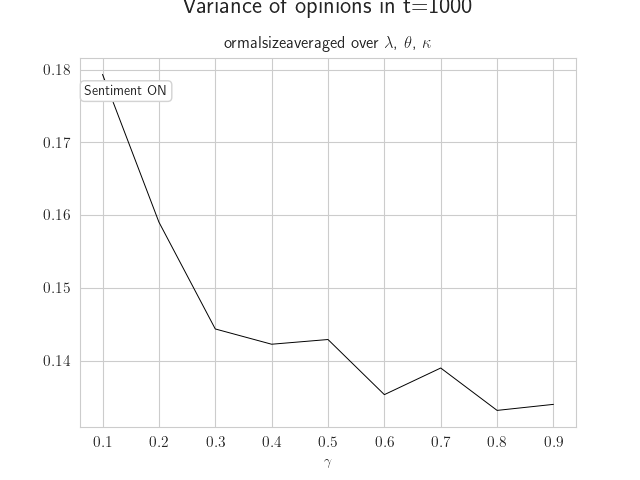

In [30]:
plt.figure()
plt.title(f"\LARGE{{Variance of opinions in t=1000}} \n \normalsize{{averaged over {l}, {th}, {k}}}")

plt.plot([i*0.1 for i in range(1,10)], var_g, c='black', lw=0.7)

plt.xticks([i*0.01 for i in range(10, 91, 10)])

plt.xlabel(g)

# textbox
ax = plt.gca()
props = dict(boxstyle='round', facecolor='white', edgecolor='lightgrey', alpha=1)
plt.text(0.009, 0.9, 'Sentiment ON', transform=ax.transAxes, bbox=props)
ax.tick_params(axis='both', labelsize=11)

plt.savefig('exploratory_figures/variance/gamma_SY.png')

<IPython.core.display.Javascript object>


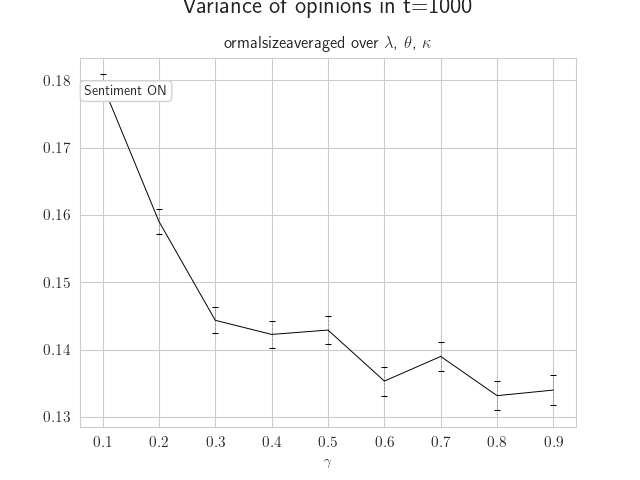

In [31]:
plt.figure()
plt.title(f"\LARGE{{Variance of opinions in t=1000}} \n \normalsize{{averaged over {l}, {th}, {k}}}")

eb = plt.errorbar([i*0.1 for i in range(1,10)], var_g, var_g_er, c='black', lw=0.7,
                  elinewidth=0.5, capsize=2, capthick=0.75)
eb[-1][0].set_linestyle('--')
eb[-1][0].set_alpha(0.35)

plt.xticks([i*0.01 for i in range(10, 91, 10)])

# textbox
ax = plt.gca()
props = dict(boxstyle='round', facecolor='white', edgecolor='lightgrey', alpha=1)
plt.text(0.009, 0.9, 'Sentiment ON', transform=ax.transAxes, bbox=props)
ax.tick_params(axis='both', labelsize=11)

plt.xlabel(g)
plt.savefig('exploratory_figures/variance_erbars/gamma_SY.png')

### $\gamma|\lambda$

In [32]:
var_g_l = np.array([np.array([var[j,:,i,:].mean() for i in range(9)]) for j in range(19)]).reshape((19,9))

<IPython.core.display.Javascript object>


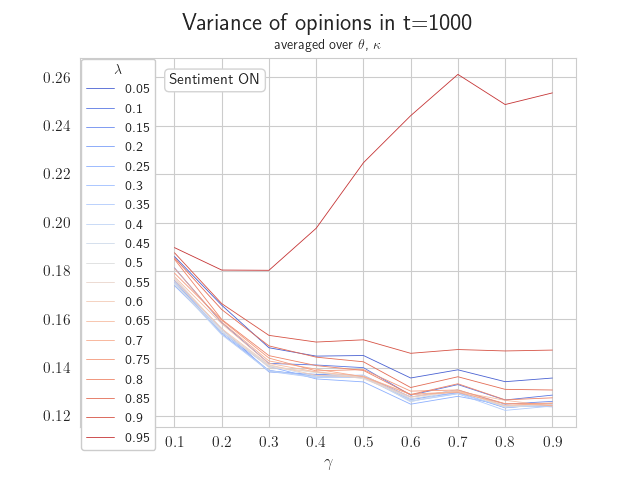

In [33]:
plt.figure()
plt.title(f"\LARGE{{Variance of opinions in t=1000}} \n \\normalsize{{averaged over {th}, {k}}}")

x = np.linspace(0.1, 0.9, 9)

for i in range(19):
    plt.plot(x, var_g_l[i], c=cmap_l[i], lw=0.6, label=int(vals[i])/100)
    
plt.xlabel(g, fontsize=12)
plt.xlim(-0.1, 0.95)
plt.xticks(np.linspace(0.1, 0.9, 9))

# textbox
ax = plt.gca()
props = dict(boxstyle='round', facecolor='white', edgecolor='lightgrey', alpha=1)
plt.text(0.18, 0.928, 'Sentiment ON', transform=ax.transAxes, bbox=props, fontsize=11)
ax.tick_params(axis='both', labelsize=11)

plt.legend(title=l, fontsize=10, loc='upper left', bbox_to_anchor=(-0.0125,1.016), framealpha=1)

plt.savefig('exploratory_figures/variance/gamma_lambda_SY.png')
plt.savefig('exploratory_figures/variance/var_gamma_lambda_SY_cred.eps')

### $\gamma|\theta$

In [34]:
var_g_t = np.array([var[:,i,j,:].mean() for i in range(9) for j in range(9)]).reshape((9,9))

<IPython.core.display.Javascript object>


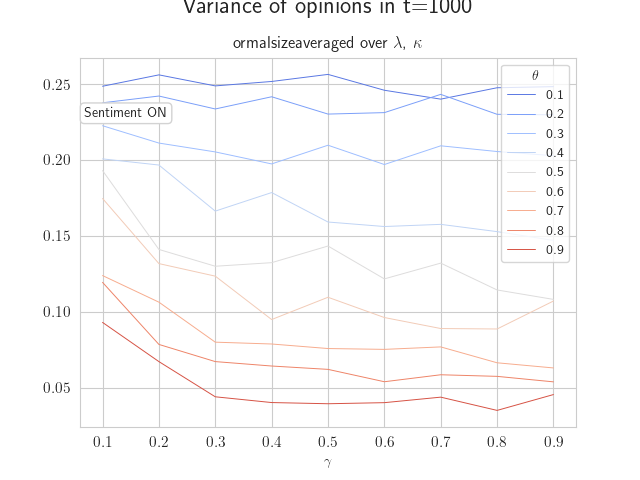

In [35]:
plt.figure()
plt.title(f"\LARGE{{Variance of opinions in t=1000}} \n \normalsize{{averaged over {l}, {k}}}")

x = np.linspace(0.1, 0.9, 9)

for i in range(9):
    plt.plot(x, var_g_t[i], c=cmap[i], lw=0.7, label=np.round(x[i], decimals=1))
    
plt.xlabel(g)

# textbox
ax = plt.gca()
props = dict(boxstyle='round', facecolor='white', edgecolor='lightgrey', alpha=1)
plt.text(0.009, 0.84, 'Sentiment ON', transform=ax.transAxes, bbox=props)
ax.tick_params(axis='both', labelsize=11)

plt.legend(title=th, fontsize=10)

plt.savefig('exploratory_figures/variance/gamma_theta_SY.png')

### $\gamma|\kappa$

In [36]:
var_g_k = np.array([var[:,:,j,i].mean() for i in range(9) for j in range(9)]).reshape((9,9))

<IPython.core.display.Javascript object>


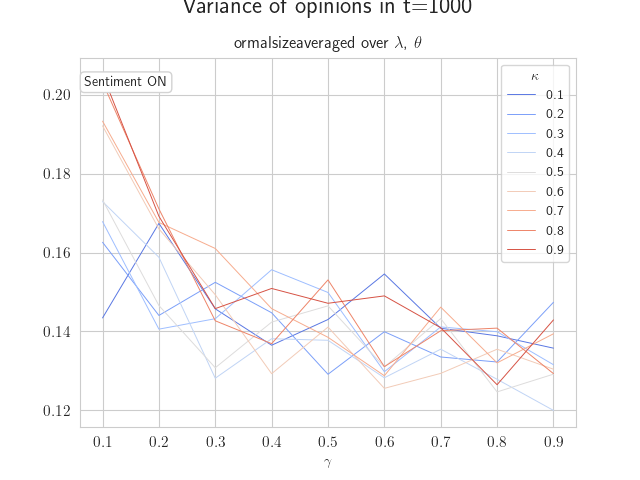

In [37]:
plt.figure()
plt.title(f"\LARGE{{Variance of opinions in t=1000}} \n \normalsize{{averaged over {l}, {th}}}")

x = np.linspace(0.1, 0.9, 9)

for i in range(9):
    plt.plot(x, var_g_k[i], c=cmap[i], lw=0.7, label=np.round(x[i], decimals=1))
    
plt.xlabel(g)

# textbox
ax = plt.gca()
props = dict(boxstyle='round', facecolor='white', edgecolor='lightgrey', alpha=1)
plt.text(0.009, 0.924, 'Sentiment ON', transform=ax.transAxes, bbox=props)
ax.tick_params(axis='both', labelsize=11)

plt.legend(title=k, fontsize=10)

plt.savefig('exploratory_figures/variance/gamma_kappa_SY.png')

## $K$

Integrate statistics of interest $T$ (variance) to find unconditional statistics for different values of $\kappa$.

Sums move in steps of $10^{-1}$, except for $\lambda$

$T(\kappa) = \frac{1}{19\cdot9^2}\sum_{\theta=0.1}^{0.9}\sum_{\gamma=0.1}^{0.9}\sum_{\lambda=0.05}^{0.95}T(\lambda, \theta, \gamma, \kappa)$

In [38]:
n = len(var[:,:,:,0].flatten())
var_k = np.array([np.mean(var[:,:,:,i]) for i in range(9)]) 
var_k_er = np.array([np.std(var[:,:,:,i].flatten()) / np.sqrt(n) for i in range(9)])

<IPython.core.display.Javascript object>


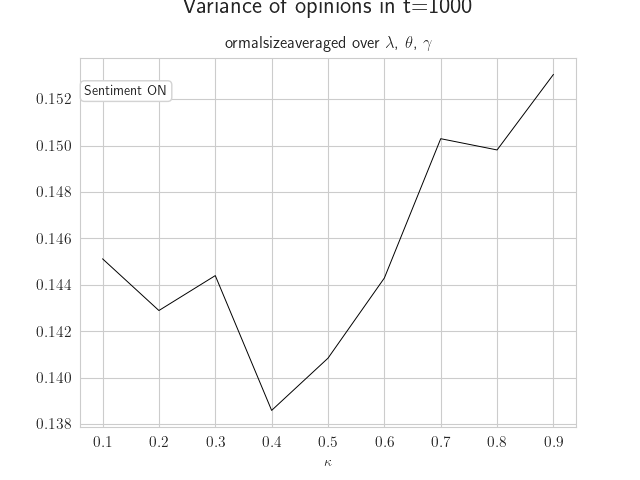

In [39]:
plt.figure()
plt.title(f"\LARGE{{Variance of opinions in t=1000}} \n \normalsize{{averaged over {l}, {th}, {g}}}")

plt.plot([i*0.1 for i in range(1,10)], var_k, c='black', lw=0.7)

plt.xticks([i*0.01 for i in range(10, 91, 10)])

plt.xlabel(k)

# textbox
ax = plt.gca()
props = dict(boxstyle='round', facecolor='white', edgecolor='lightgrey', alpha=1)
plt.text(0.009, 0.9, 'Sentiment ON', transform=ax.transAxes, bbox=props)
ax.tick_params(axis='both', labelsize=11)

plt.savefig('exploratory_figures/variance/kappa_SY.png')

<IPython.core.display.Javascript object>


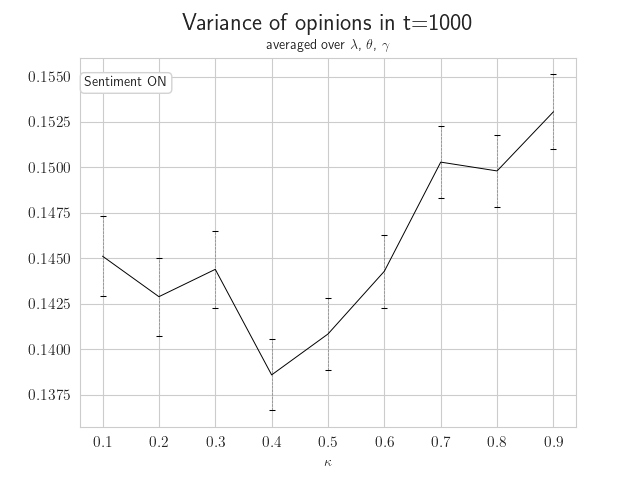

In [40]:
plt.figure()
plt.title(f"\LARGE{{Variance of opinions in t=1000}} \n \\normalsize{{averaged over {l}, {th}, {g}}}")

eb = plt.errorbar([i*0.1 for i in range(1,10)], var_k, var_k_er, c='black', lw=0.7,
                  elinewidth=0.5, capsize=2, capthick=0.75)
eb[-1][0].set_linestyle('--')
eb[-1][0].set_alpha(0.35)

plt.xticks([i*0.01 for i in range(10, 91, 10)])

# textbox
ax = plt.gca()
props = dict(boxstyle='round', facecolor='white', edgecolor='lightgrey', alpha=1)
plt.text(0.009, 0.922, 'Sentiment ON', transform=ax.transAxes, bbox=props)
ax.tick_params(axis='both', labelsize=11)

plt.xlabel(k)
plt.savefig('exploratory_figures/variance_erbars/kappa_SY.png')

### $\kappa|\lambda$

In [41]:
var_k_l = np.array([np.array([var[j,:,:,i].mean() for i in range(9)]) for j in range(19)]).reshape((19,9))

C:\Users\cleme\AppData\Local\Temp/ipykernel_19360/4253206831.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<IPython.core.display.Javascript object>


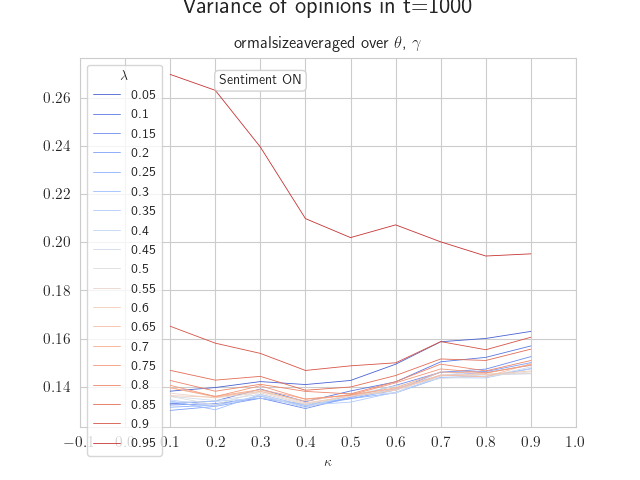

In [42]:
plt.figure()
plt.title(f"\LARGE{{Variance of opinions in t=1000}} \n \normalsize{{averaged over {th}, {g}}}")

x = np.linspace(0.1, 0.9, 9)

for i in range(19):
    plt.plot(x, var_k_l[i], c=cmap_l[i], lw=0.6, label=int(vals[i])/100)
    
plt.xlabel(k)
plt.xticks(np.linspace(-.1, 1, 12))

# textbox
ax = plt.gca()
props = dict(boxstyle='round', facecolor='white', edgecolor='lightgrey', alpha=1)
plt.text(0.28, 0.928, 'Sentiment ON', transform=ax.transAxes, bbox=props)
ax.tick_params(axis='both', labelsize=11)
 
plt.legend(title=l, fontsize=10)

plt.savefig('exploratory_figures/variance/kappa_lambda_SY.png')

### $\kappa|\theta$

In [43]:
var_k_t = np.array([var[:,i,:,j].mean() for i in range(9) for j in range(9)]).reshape((9,9))

In [44]:
var_k_g = np.array([var[:,:,i,j].mean() for i in range(9) for j in range(9)]).reshape((9,9))

<IPython.core.display.Javascript object>


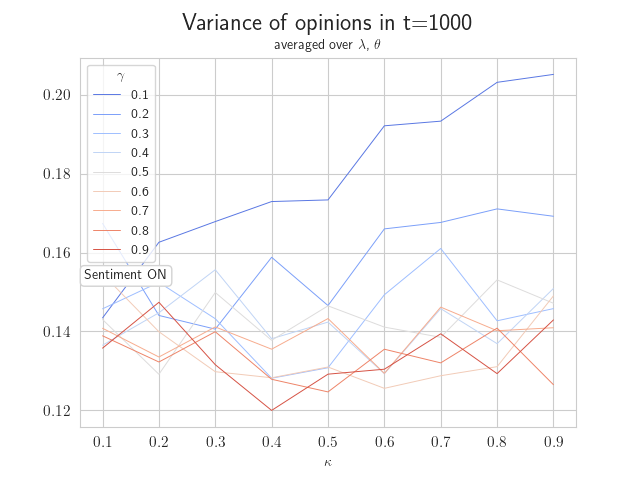

In [45]:
plt.figure()
plt.title(f"\LARGE{{Variance of opinions in t=1000}} \n \\normalsize{{averaged over {l}, {th}}}")

x = np.linspace(0.1, 0.9, 9)

for i in range(9):
    plt.plot(x, var_k_g[i], c=cmap[i], lw=0.7, label=np.round(x[i], decimals=1))
    
plt.xlabel(k)

# textbox
ax = plt.gca()
props = dict(boxstyle='round', facecolor='white', edgecolor='lightgrey', alpha=1)
plt.text(0.009, 0.4, 'Sentiment ON', transform=ax.transAxes, bbox=props)
ax.tick_params(axis='both', labelsize=11)

plt.legend(title=g, fontsize=10)

plt.savefig('exploratory_figures/variance/kappa_gamma_SY.png')